In [ ]:
# installing pynmranalysis package
!pip install pynmranalysis==1.1.3

# Preprocessing

##read coronary heart disease (CHD) data 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#read coronary heart disease data
spectrum = pd.read_csv("CHD.csv")

In [ ]:
#convert columns from string to real numbers
columns = [float(x) for x in spectrum.columns]
spectrum.columns  = columns


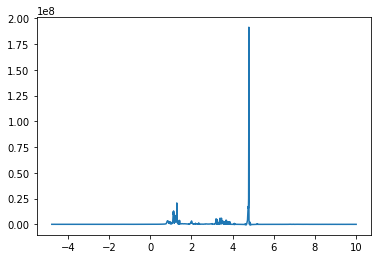

In [ ]:
#visualize the first spectrum 
plt.plot(spectrum.iloc[0])

##binning || bucketing

In [ ]:
from pynmranalysis.preprocessing import binning

The Bucketing function reduces the number of spectral descriptors by aggregating intensities into a series of buckets.

In [ ]:
binned_data = binning(spectrum ,width=True ,  bin_size = 0.04 , int_meth='simps' , verbose=False)

In [ ]:
binned_data.shape

(71, 369)

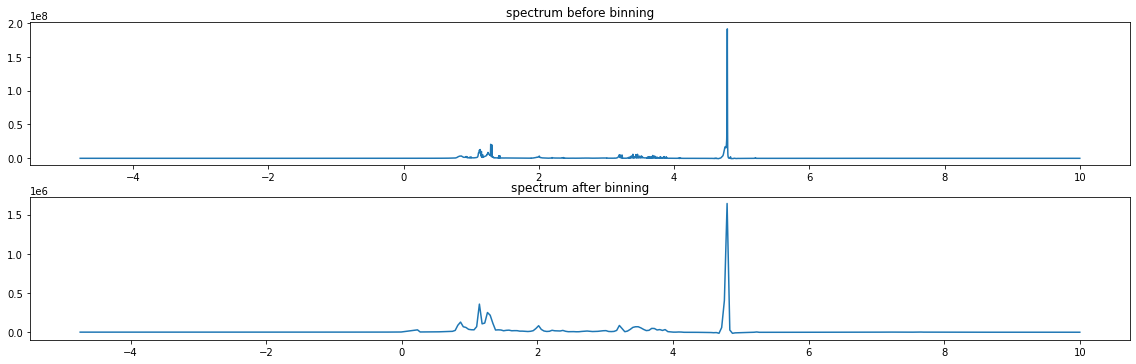

In [ ]:
fig , axs = plt.subplots(2,1 , figsize = (16,5))
fig.tight_layout()
axs[0].plot(spectrum.iloc[0] )
axs[0].set(title = 'spectrum before binning')
axs[1].plot(binned_data.iloc[0] )
axs[1].set(title = 'spectrum after binning')
plt.show()

## Region removal 

By default, this step sets to zero spectral areas that are of no interest or have a sigificant and unwanted amount of variation (e.g. the water area).

In [ ]:
from pynmranalysis.preprocessing import region_removal

In [ ]:
r_spectrum = region_removal(spectrum=binned_data )

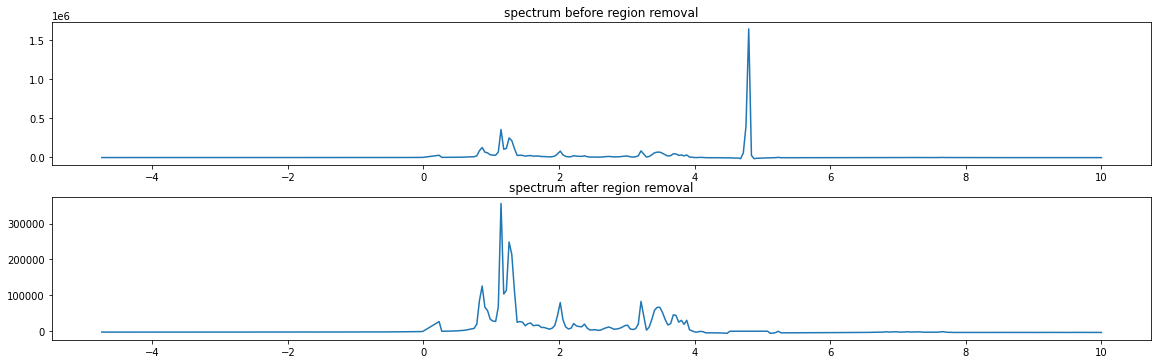

In [ ]:
fig , axs = plt.subplots(2,1, figsize = (16,5))
fig.tight_layout()
axs[0].plot(binned_data.iloc[0] )
axs[0].set(title = 'spectrum before region removal')
axs[1].plot(r_spectrum.iloc[0] )
axs[1].set(title = 'spectrum after region removal')
plt.show()

#Normalization 

In [ ]:
from pynmranalysis.normalization import mean_normalization 

The normalization copes with the dilution factor and other issues that render the spectral profiles non-comparable to each other.

In [ ]:
norm_spectrum = mean_normalization(r_spectrum , verbose=False)

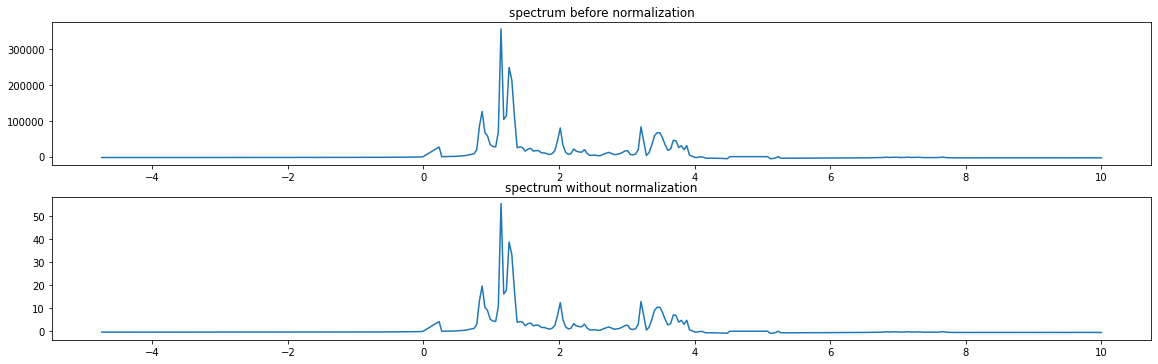

In [ ]:
fig , axs = plt.subplots(2,1, figsize = (16,5))
fig.tight_layout()
axs[0].plot(r_spectrum.iloc[0] )
axs[0].set(title = 'spectrum before normalization')
axs[1].plot(norm_spectrum.iloc[0] )
axs[1].set(title = 'spectrum without normalization')
plt.show()

#Statistical analysis

##read data (digestive disease data ) 

In [ ]:
#read data
data = pd.read_pickle('digestive_disease_data.pkl')

In [ ]:
# split data into predictive variables (spectrums) and target varibles (digestive disease group)
# target -->  1 :Biliary/Pancreatic Diseases | 0 : Intestinal Diseases
spectrum = data.iloc[ : , :-1]
target = data.iloc[ : , -1].values

## visualization 

In [ ]:
# data // first 5 spectrum and their classes 
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,target
MAP003,-3531.237644,-3295.915883,-22831.531190,17491.456450,668.489751,-25068.55115,-7203.273301,-17642.87626,11465.30835,2746.288575,-500.51310,33675.99570,49736.85996,80009.06272,162451.8154,213839.5215,208704.5211,272820.4221,549915.7389,704218.3515,502400.1457,419799.3332,550652.4180,8.561223e+05,858222.529,2084648.744,10049932.54,32699222.94,78906663.35,54573771.38,1.034016e+07,7666100.904,8166502.723,7999809.128,6779710.761,3127341.036,3233912.063,3230326.808,1383030.420,1373739.725,...,1298.982116,11504.25068,10771.986710,-31995.250650,-39463.641140,24516.698400,-25379.764590,-19777.258600,-8546.002597,-25673.595350,-20856.80452,114218.42260,39015.93277,-17374.190920,-6500.511242,4705.294595,-26744.293000,-20424.818840,-14801.638110,-22440.506940,-11245.255310,-22550.185860,-36293.520160,-29834.925640,-17968.42277,384.414107,-8788.275238,-24130.036710,-25034.37957,-27290.813340,-13463.465460,6921.732581,-28456.930820,-31791.122190,-21722.391930,-3843.536045,-12519.387030,-11165.21295,-19323.455690,0
MAP011,11943.337160,18411.268340,39368.642060,28569.783060,20954.270740,16054.43505,7025.045041,25122.78073,65111.91253,56236.712550,56790.23304,72200.33159,113769.16940,148562.48990,159269.3868,181761.5318,258928.2021,423356.6678,442625.8135,575984.7352,534020.7238,702697.3548,863726.1974,1.104815e+06,1783147.315,9582087.911,38402613.12,54941772.31,55129108.81,27208889.08,7.771638e+06,7136203.145,7384170.906,5762755.586,5108397.031,2209245.299,2630567.669,2578759.226,1191499.952,1231804.996,...,-7292.797461,-11052.08812,9026.783663,-11309.250060,-11800.942830,-862.275280,11292.646450,5018.260133,18556.566490,-40583.200050,-27599.77247,23501.20023,57686.72468,-15247.706920,-6927.090903,-10356.412290,-23039.950490,-15629.805780,-24950.468040,19569.067180,-2937.077151,-16553.022190,-4495.829926,-4848.437419,-12918.42575,-17690.778070,-9217.207931,-10557.362410,-10938.22632,-18553.301100,25207.161590,13983.899490,-4293.979095,-12703.281200,3413.161949,-20661.030160,-19284.110030,-22388.89650,-14609.770980,1
MAP013,15682.285480,23246.403090,39419.472650,18824.767780,16179.048030,43597.56344,41977.314490,37748.60925,36865.62561,50169.594720,61841.18516,66741.89834,93844.94587,116227.47660,159141.7491,155041.2336,206425.2327,301900.7104,384775.2755,513426.2512,551849.7437,587248.9213,695062.0903,1.018603e+06,1618379.678,7143153.189,25683021.46,34189007.24,46209321.86,39853428.80,1.005008e+07,8367371.190,9480310.142,7372397.951,6280151.609,2587452.840,3220040.202,3113491.732,1269992.363,1076599.945,...,670.897156,19431.65324,33418.835200,12594.652610,-1452.872975,13648.161210,-2866.855325,6307.215873,8713.080742,6865.785419,15495.08158,39227.94400,58647.31790,-2549.031101,-5205.934371,16831.800070,8491.734158,8568.238485,10509.656590,13420.493720,11198.525110,-9622.034749,-8459.234405,11837.023630,20294.07143,11792.684260,4356.169464,9970.316938,10404.77489,3907.835312,5312.142024,17366.505230,-20733.491260,4685.455471,480.025584,25070.861370,6785.798905,32301.00659,-8821.073338,0
MAP030,30615.937290,19189.560370,875.877201,30117.793440,28592.892670,31803.52990,15802.185600,50050.10005,55097.33773,42527.951110,64712.58890,67087.97860,99605.26111,118970.51520,154857.2574,177748.2953,237399.8239,485389.5383,509831.3579,529768.0679,570442.7073,702612.0233,885447.6226,1.106069e+06,1731621.053,7907269.783,37824922.69,57442858.13,49669153.59,31040449.51,9.200568e+06,7855101.105,8096744.763,7220989.705,7166014.741,3355861.906,3494780.191,3645132.546,1416774.752,1198116.360,...,-12397.539400,-19738.14590,21381.831880,6846.289354,-24383.620400,4378.183198,-20643.323260,7506.404377,-2808.254983,-6663.225038,-19668.57428,10595.86428,88543.75199,-43318.031830,-29040.2238

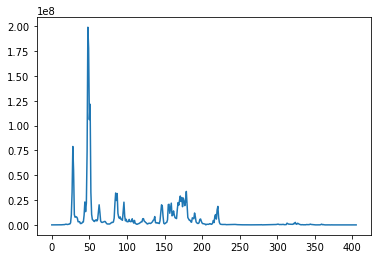

In [ ]:
import matplotlib.pyplot as plt
plt.plot(spectrum.iloc[0])

##PCA

In [ ]:
from pynmranalysis.analysis import PyPCA

In [ ]:
#create pypca instance 
pca = PyPCA(n_comps=3) 
#fit the model to data
pca.fit(spectrum)

### score plot 

**score plot** is the projection of samples in the data set in lower dimention spce of the first 2 componants of the model 

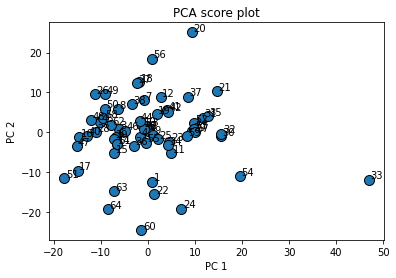

In [ ]:
pca.score_plot()

###scree plot

**scree plot** is agraph that show each componant of the pca model with their explained variance

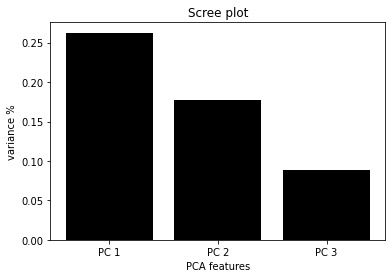

In [ ]:
pca.scree_plot()

### outlier plot 

**outiler plot** is a plot that calculate index of outlieres in the data and plot them with different color 

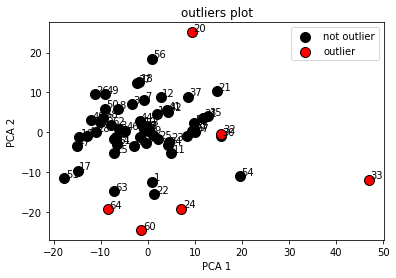

In [ ]:
pca.outlier_plot(x=spectrum)

### target plot 

**target plot** is a scatter plot that shows the projection of each simple in the first 2 componants with colors that much their classses in the target variable

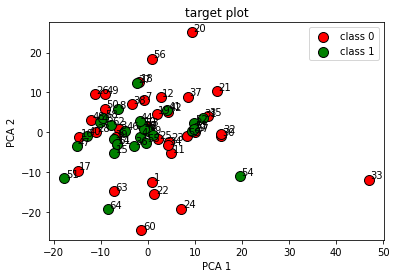

In [ ]:
pca.target_plot( target)

##PLS-DA

In [ ]:
from pynmranalysis.analysis import PyPLS_DA

In [ ]:
#create pyplsda instance 
plsda = PyPLS_DA(ncomps=3) 
#fit the model to data
plsda.fit(spectrum , target)

###Interia plot 

**interia plot** is a paired barbot that shows **R2Y** (goodness of the fit ) score and **R2Y** (goodnes of predection with cross validation) 

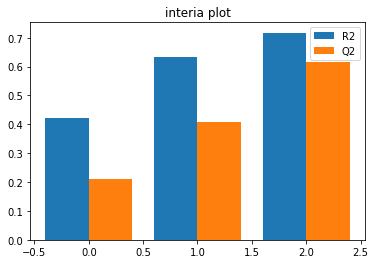

In [ ]:
plsda.inertia_barplot(spectrum, target)

### score plot 

**PLSDA score plot** is a scatter plot that shows the projection of simples in the first 2 latennt variables 

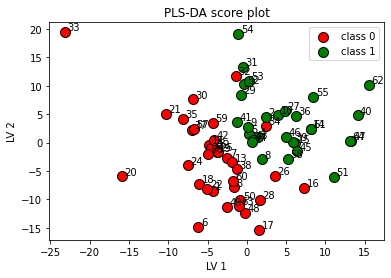

In [ ]:
plsda.score_plot(target)